# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
# descriptive statistics 
# inferential statistics
# Both of the above live in a branch of statistics called probability theory
# Set theory

In [0]:
# good resource to check out my options in the dir
from scipy import stats
dir(stats)

In [77]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [78]:
# And a new friend - t
# t-tests are how we describe the mean of different samples
# General rule: have at least 30 observations
t1 = stats.t(30)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.0350983390135313
1.0714285714285714


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [79]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [80]:
# lambda samples
lambda_heights = [72, 72, 77, 72, 73, 67, 64, 58, 63, 78]

import pandas as pd

df = pd.DataFrame({'heights': lambda_heights})
df.head(10)

,heights
0,72
1,72
2,77
3,72
4,73
5,67
6,64
7,58
8,63
9,78


In [81]:
df.heights.mean()

69.6

In [82]:
import random 
random.seed(10)

population = []

for _ in range(1000):
  population.append(random.randint(0,1))
  
print(population)
print(len(population))

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

In [83]:
sample = random.sample(population, 100)
print(sample)
print(len(sample))

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
100


In [84]:
import numpy as np

def mean(list):
  average = np.sum(list)/ len(list)
  return average

print("Population Mean:", mean(population))
print("Sample mean:",  mean(sample))

Population Mean: 0.507
Sample mean: 0.46


In [86]:
df = pd.DataFrame({"likes_coke": sample})
df.head()

df.likes_coke.mean()

0.46

In [87]:
# This demonstrates the degrees of freedom  n-1
def variance(list):
  n = len(list)
  return np.sum((list - mean(list))**2)/(n-1)
  
variance(df.likes_coke)

0.25090909090909086

In [88]:
def stddev(list):
  var = variance(list)
  return var**(1/2) 

stddev(df.likes_coke)

0.5009082659620331

<img src="https://www.ahajournals.org/cms/attachment/850f8023-e028-4694-a946-bbdbdaa9009b/15mm6.jpg"  width ='200'/>

In [89]:
#t-stat is the difference between 2 groups

n = len(df.likes_coke)
t_stat = (mean(df.likes_coke) - mean(population)) / stddev(df.likes_coke) / n**(1/2)

print(t_stat)

-0.00938295556168011


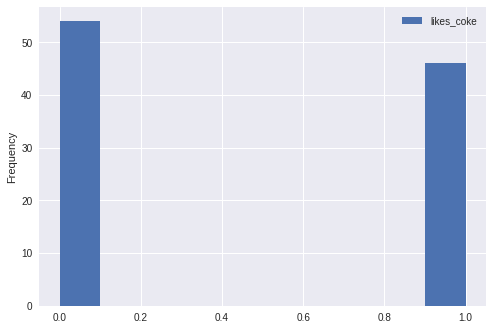

In [90]:
df.plot.hist();

In [91]:
import scipy

# dir(scipy.stats)
scipy.stats.ttest_1samp(df['likes_coke'], mean(population))

Ttest_1sampResult(statistic=-0.9382955561680112, pvalue=0.3503760732929039)

In [92]:
df.likes_coke.describe()

count    100.000000
mean       0.460000
std        0.500908
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: likes_coke, dtype: float64

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

Attribute Information:
  1. Class Name: 2 (democrat, republican)
  2. handicapped-infants: 2 (y,n)
  3. water-project-cost-sharing: 2 (y,n)
  4. adoption-of-the-budget-resolution: 2 (y,n)
  5. physician-fee-freeze: 2 (y,n)
  06. el-salvador-aid: 2 (y,n)
  07. religious-groups-in-schools: 2 (y,n)
  08. anti-satellite-test-ban: 2 (y,n)
  09. aid-to-nicaraguan-contras: 2 (y,n)
  10. mx-missile: 2 (y,n)
  11. immigration: 2 (y,n)
  12. synfuels-corporation-cutback: 2 (y,n)
  13. education-spending: 2 (y,n)
  14. superfund-right-to-sue: 2 (y,n)
  15. crime: 2 (y,n)
  16. duty-free-exports: 2 (y,n)
  17. export-administration-act-south-africa: 2 (y,n)

**Loading the Data, and assigning the column names to the appropriate cols**

In [93]:
# when i first pulled this in the cols were a mess, so I just fixed it and ran it again
cols = [
  'Class Name',
  'handicapped-infants',
  'water-project-cost-sharing',
  'adoption-of-the-budget-resolution',
  'physician-fee-freeze',
  'el-salvador-aid',
  'religious-groups-in-schools',
  'anti-satellite-test-ban',
  'aid-to-nicaraguan-contras',
  'mx-missile',
  'immigration',
  'synfuels-corporation-cutback',
  'education-spending',
  'superfund-right-to-sue',
  'crime',
  'duty-free-exports',
  'export-administration-act-south-africa'
]

congress = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=cols) 

congress.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


**Clean the data**

**Representations: **

**No = 0**

**Yes = 1**

**Unknown = NaN**

In [94]:
# I see that the missing values are represented by '?'
# I want to replace the ? with NaN
# And change n to 0, and y to 1

congress = congress.replace({'?':np.nan , 'n':0, 'y':1})
congress.isnull().sum().sum()

392

In [0]:
# Checking out the DF
congress.head()

In [0]:
# Checking out a Summary of the DF
congress.describe()

**Hypothesis Testing**

In [96]:
congress['Class Name'].value_counts()

democrat      267
republican    168
Name: Class Name, dtype: int64

In [0]:
congress = congress.sort_values(by='Class Name')

In [0]:
dems = congress.head(267)
reps = congress.tail(168)

In [99]:
# Looking at the Dems specifically
dems.describe().T['mean']

handicapped-infants                       0.604651
water-project-cost-sharing                0.502092
adoption-of-the-budget-resolution         0.888462
physician-fee-freeze                      0.054054
el-salvador-aid                           0.215686
religious-groups-in-schools               0.476744
anti-satellite-test-ban                   0.772201
aid-to-nicaraguan-contras                 0.828897
mx-missile                                0.758065
immigration                               0.471483
synfuels-corporation-cutback              0.505882
education-spending                        0.144578
superfund-right-to-sue                    0.289683
crime                                     0.350195
duty-free-exports                         0.637450
export-administration-act-south-africa    0.935135
Name: mean, dtype: float64

In [100]:
# Looking at the Reps specifically
reps.describe().T['mean']

handicapped-infants                       0.187879
water-project-cost-sharing                0.506757
adoption-of-the-budget-resolution         0.134146
physician-fee-freeze                      0.987879
el-salvador-aid                           0.951515
religious-groups-in-schools               0.897590
anti-satellite-test-ban                   0.240741
aid-to-nicaraguan-contras                 0.152866
mx-missile                                0.115152
immigration                               0.557576
synfuels-corporation-cutback              0.132075
education-spending                        0.870968
superfund-right-to-sue                    0.860759
crime                                     0.981366
duty-free-exports                         0.089744
export-administration-act-south-africa    0.657534
Name: mean, dtype: float64

In [102]:
# Putting it all together in a more visually appealing DF
summary = congress.pivot_table(index='Class Name', values=(list(congress.columns)))
summary.head().T

Class Name,democrat,republican
adoption-of-the-budget-resolution,0.888462,0.134146
aid-to-nicaraguan-contras,0.828897,0.152866
anti-satellite-test-ban,0.772201,0.240741
crime,0.350195,0.981366
duty-free-exports,0.637450,0.089744
education-spending,0.144578,0.870968
el-salvador-aid,0.215686,0.951515
export-administration-act-south-africa,0.935135,0.657534
handicapped-infants,0.604651,0.187879
immigration,0.471483,0.557576


## **The Highest Rankings for Dem & Rep Support**
## Democrats:
*  adoption-of-the-budget-resolution
*  aid-to-nicaraguan-contras
*  export-administration-act-south-africa	
*  anti-satellite-test-ban

## Republicans:
*   physician-fee-freeze
*   crime
*   religious-groups-in-schools

**Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01**

In [104]:
# Performing a Two Sample T-Test
# Omitting NaNs as I go
scipy.stats.ttest_ind(dems['aid-to-nicaraguan-contras'],reps['aid-to-nicaraguan-contras'],nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=18.254856278479288, pvalue=2.2881206640097267e-52)

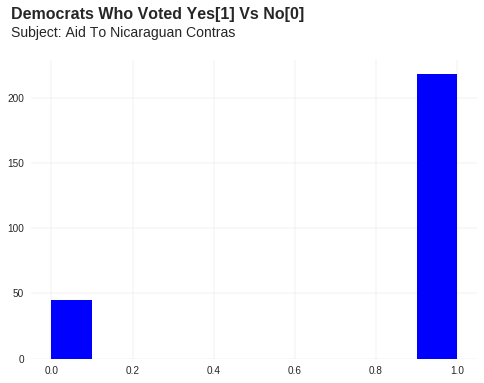

In [143]:
fig, ax = plt.subplots()
dems['aid-to-nicaraguan-contras'].hist(color='blue')

# Setting the colors
ax.set_facecolor('#FFFFFF')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.3)

# Hide Y-label
ax.set_ylabel('')

# Title 
ax.text(s="Democrats Who Voted Yes[1] Vs No[0]", y=260, x=-.1, fontsize=16, fontweight='semibold')
ax.text(s="Subject: Aid To Nicaraguan Contras", 
        y=246, x=-.1, fontsize=14);

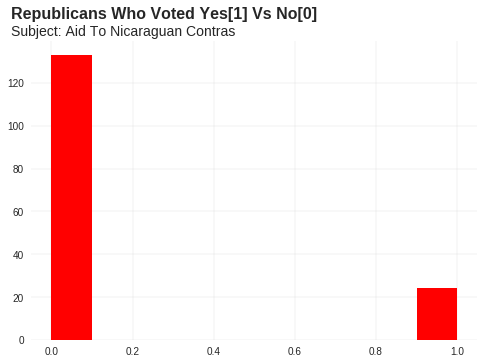

In [139]:
fig, ax = plt.subplots()
reps['aid-to-nicaraguan-contras'].hist(color='red')

# Setting the colors
ax.set_facecolor('#FFFFFF')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.3)

# Hide Y-label
ax.set_ylabel('')

# Title 
ax.text(s="Republicans Who Voted Yes[1] Vs No[0]", y=150, x=-.1, fontsize=16, fontweight='semibold')
ax.text(s="Subject: Aid To Nicaraguan Contras", 
        y=142, x=-.1, fontsize=14);

### Based on the above visualizations, we can conclude that more democrats voted yes in favor of providing aid to Nicaraguan Contras. 

**Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01**

In [163]:
scipy.stats.ttest_ind(dems['physician-fee-freeze'],reps['physician-fee-freeze'],nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=-56.70480591963001, pvalue=8.82076091455592e-193)

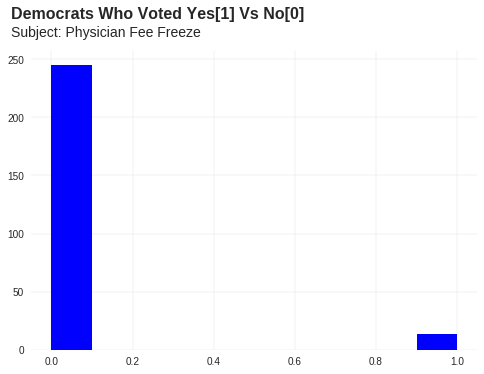

In [168]:
fig, ax = plt.subplots()
dems['physician-fee-freeze'].hist(color='blue')

# Setting the colors
ax.set_facecolor('#FFFFFF')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.3)

# Hide Y-label
ax.set_ylabel('')

# Title 
ax.text(s="Democrats Who Voted Yes[1] Vs No[0]", y=285, x=-.1, fontsize=16, fontweight='semibold')
ax.text(s="Subject: Physician Fee Freeze", 
        y=270, x=-.1, fontsize=14);

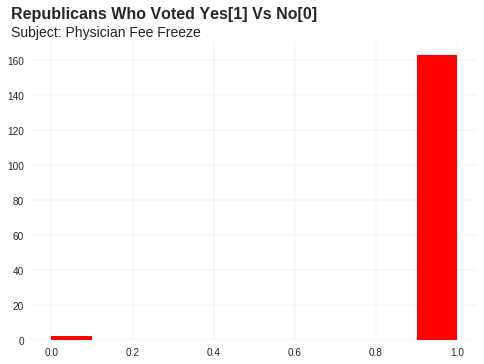

In [172]:
fig, ax = plt.subplots()
reps['physician-fee-freeze'].hist(color='red')

# Setting the colors
ax.set_facecolor('#FFFFFF')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.3)

# Hide Y-label
ax.set_ylabel('')

# Title 
ax.text(s="Republicans Who Voted Yes[1] Vs No[0]", y=184, x=-.1, fontsize=16, fontweight='semibold')
ax.text(s="Subject: Physician Fee Freeze ", 
        y=174, x=-.1, fontsize=14);

### **Based on the above visualizations, it is very clear that the republican side was in favor of supporting physician fee freeze.**

**Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)**

In [150]:
scipy.stats.ttest_ind(dems['water-project-cost-sharing'],reps['water-project-cost-sharing'],nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=-0.08893998898558053, pvalue=0.9291867875225105)

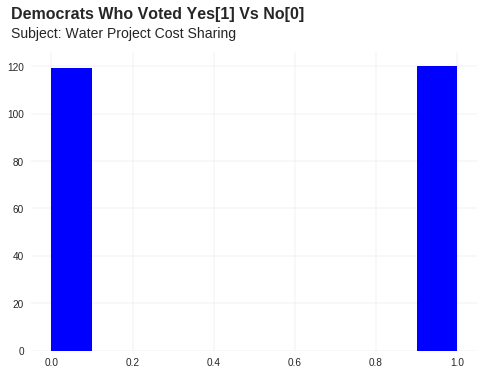

In [162]:
fig, ax = plt.subplots()
dems['water-project-cost-sharing'].hist(color='blue')

# Setting the colors
ax.set_facecolor('#FFFFFF')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.3)

# Hide Y-label
ax.set_ylabel('')

# Title 
ax.text(s="Democrats Who Voted Yes[1] Vs No[0]", y=140, x=-.1, fontsize=16, fontweight='semibold')
ax.text(s="Subject: Water Project Cost Sharing", 
        y=132, x=-.1, fontsize=14);

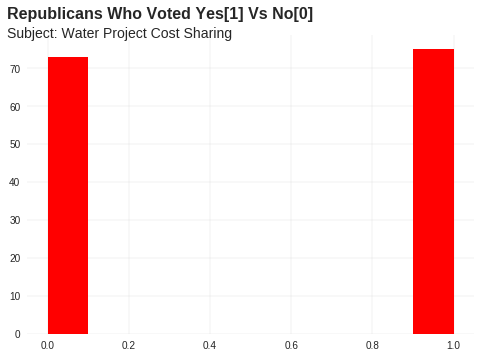

In [161]:
fig, ax = plt.subplots()
reps['water-project-cost-sharing'].hist(color='red')

# Setting the colors
ax.set_facecolor('#FFFFFF')
plt.grid(color='lightgrey', linestyle='-', linewidth=0.3)

# Hide Y-label
ax.set_ylabel('')

# Title 
ax.text(s="Republicans Who Voted Yes[1] Vs No[0]", y=83, x=-.1, fontsize=16, fontweight='semibold')
ax.text(s="Subject: Water Project Cost Sharing", 
        y=78, x=-.1, fontsize=14);

### **The votes were both very split in both parties for the Water Project Cost Sharing**

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars